<a href="https://www.kaggle.com/code/zurainzeeshan/credit-score-analysis?scriptVersionId=153490007" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv


# Credit Score Classification
**CRISP-DM Framework**

**1) Business Problem**

- What factors and variables contribute the most to determining credit scores?
- Do certain professions with high monthly income have better credit scores than others?
- Is it possible to predict a credit score of an individual based on specific attributes?

**2) Data Understanding and Preparation**

In [2]:
import numpy as np
import pandas as pd

data_path = '/kaggle/input/credit-score-classification/train.csv'
train_df = pd.read_csv(data_path, low_memory=False)

train_df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


We remove some attributes that are not accurate and will not contribute to the analysis. This is done because we want to keep the dataset concise, clean and with all factors that we think are relevant. This will create a clean and appropriate data table that will be more useful.

In [3]:
columns_to_remove = ['Customer_ID','Month', 'Name', 'SSN', 'Payment_of_Min_Amount', 'Num_Credit_Card', 
                     'Num_Credit_Inquiries', 'Delay_from_due_date', 'Changed_Credit_Limit']

train_df = train_df.drop(columns=columns_to_remove)

train_df.head(10)

,ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,23,Scientist,19114.12,1824.843333,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,809.98,26.822620,22 Years and 1 Months,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,23,Scientist,19114.12,NaN,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,Good,809.98,31.944960,NaN,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,-500,Scientist,19114.12,NaN,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,Good,809.98,28.609352,22 Years and 3 Months,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,23,Scientist,19114.12,NaN,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,Good,809.98,31.377862,22 Years and 4 Months,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,23,Scientist,19114.12,1824.843333,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,Good,809.98,24.797347,22 Years and 5 Months,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,23,Scientist,19114.12,NaN,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,Good,809.98,27.262259,22 Years and 6 Months,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,23,Scientist,19114.12,1824.843333,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8_,Good,809.98,22.537593,22 Years and 7 Months,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,23,Scientist,19114.12,1824.843333,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,Good,809.98,23.933795,NaN,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,28_,_______,34847.84,3037.986667,2,6,1,Credit-Builder Loan,4,Good,605.03,24.464031,26 Years and 7 Months,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,28,Teacher,34847.84,3037.986667,2,6,1,Credit-Builder Loan,1,Good,605.03,38.550848,26 Years and 8 Months,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [4]:
num_of_columns = len(train_df.columns)
num_of_rows = len(train_df.index)

print("Number of columns: ", num_of_columns)
print("Number of rows: ", num_of_rows)

Number of columns:  19
Number of rows:  100000


In [5]:
missing_values = train_df.isnull().sum()

print("Number of missing values:\n", missing_values)

Number of missing values:
 ID                              0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Num_of_Delayed_Payment       7002
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [6]:
train_df.dtypes

ID                           object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Num_of_Delayed_Payment       object
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

We clean the data by removing all null and duplicate values, cleaning the 'Age' and 'Annual_Income' columns by removing underscores and converting the 'Age' column to float type and removing all negative and very high age values

In [7]:
train_df = train_df.dropna()
train_df.drop_duplicates()

train_df['Annual_Income'] = train_df['Annual_Income'].astype(str).str.replace('_', '')
train_df['Annual_Income'] = pd.to_numeric(train_df['Annual_Income'], errors='coerce')

train_df['Outstanding_Debt'] = train_df['Outstanding_Debt'].astype(str).str.replace('_', '')
train_df['Outstanding_Debt'] = pd.to_numeric(train_df['Outstanding_Debt'], errors='coerce')

train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].astype(str).str.replace('_', '')
train_df['Num_of_Delayed_Payment'] = pd.to_numeric(train_df['Num_of_Delayed_Payment'], errors='coerce')

train_df['Age'] = train_df['Age'].astype(str).str.replace('_', '')
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')

train_df = train_df[train_df['Age'] >= 0]

mask = (train_df['Age'] > 0) & (train_df['Age'] < 100)
train_df = train_df[mask]

train_df.head(10)

,ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,23,Scientist,19114.12,1824.843333,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,809.98,26.822620,22 Years and 1 Months,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,0x1608,23,Scientist,19114.12,1824.843333,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,Good,809.98,22.537593,22 Years and 7 Months,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,0x160e,28,_______,34847.84,3037.986667,2,6,1,Credit-Builder Loan,4,Good,605.03,24.464031,26 Years and 7 Months,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,28,Teacher,34847.84,3037.986667,2,6,1,Credit-Builder Loan,1,Good,605.03,38.550848,26 Years and 8 Months,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,0x1610,28,Teacher,34847.84,3037.986667,2,6,1,Credit-Builder Loan,-1,_,605.03,33.224951,26 Years and 9 Months,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
12,0x1612,28,Teacher,34847.84,3037.986667,2,6,1,Credit-Builder Loan,1,Good,605.03,34.977895,26 Years and 11 Months,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
13,0x1613,28,Teacher,34847.84,3037.986667,2,6,1,Credit-Builder Loan,0,Good,605.03,33.381010,27 Years and 0 Months,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good
15,0x1615,28,Teacher,34847.84,3037.986667,2,6,1,Credit-Builder Loan,4,Good,605.03,32.933856,27 Years and 2 Months,18.816215,218.90434353388733,Low_spent_Small_value_payments,356.07810855965045,Good
16,0x161a,34,_______,143162.64,12187.220000,1,8,3,"Auto Loan, Auto Loan, and Not Specified",8,Good,1303.01,28.616735,17 Years and 9 Months,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
17,0x161b,34,Engineer,143162.64,12187.220000,1,8,3,"Auto Loan, Auto Loan, and Not Specified",6,Good,1303.01,41.702573,17 Years and 10 Months,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good


In [8]:
unique_values = train_df['Credit_Score'].unique()
print(unique_values)

unique_values = train_df['Occupation'].unique()
print(unique_values)

['Good' 'Standard' 'Poor']
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Mechanic' 'Writer'
 'Accountant' 'Architect' 'Musician' 'Developer']


We remove blank values and convert these categorical values to numerical data for further analysis

In [9]:
train_df = train_df[train_df['Occupation'] != '_______']
train_df = train_df[train_df['Credit_Mix'] != '_']
train_df = train_df[train_df['Type_of_Loan'] != 'Not Specified']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_df['Occupation'] = label_encoder.fit_transform(train_df['Occupation'])
train_df['Credit_Mix'] = label_encoder.fit_transform(train_df['Credit_Mix'])
train_df['Type_of_Loan'] = label_encoder.fit_transform(train_df['Type_of_Loan'])
train_df['Credit_History_Age'] = label_encoder.fit_transform(train_df['Credit_History_Age'])

value_mapping = {'Good': 2, 'Standard': 1, 'Poor': 0}

label_encoder.fit(list(value_mapping.keys()))

train_df['Credit_Score_Encoded'] = train_df['Credit_Score'].map(value_mapping)

train_df.head(10)

,ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Score_Encoded
6,0x1608,23,12,19114.12,1824.843333,3,3,4,127,8,1,809.98,22.537593,187,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,2
9,0x160f,28,13,34847.84,3037.986667,2,6,1,676,1,1,605.03,38.550848,236,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,2
12,0x1612,28,13,34847.84,3037.986667,2,6,1,676,1,1,605.03,34.977895,229,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good,2
13,0x1613,28,13,34847.84,3037.986667,2,6,1,676,0,1,605.03,33.381010,238,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good,2
15,0x1615,28,13,34847.84,3037.986667,2,6,1,676,4,1,605.03,32.933856,242,18.816215,218.90434353388733,Low_spent_Small_value_payments,356.07810855965045,Good,2
17,0x161b,34,4,143162.64,12187.220000,1,8,3,62,6,1,1303.01,41.702573,108,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good,2
21,0x161f,34,4,143162.64,12187.220000,1,8,967,62,6,1,1303.01,39.783993,122,246.992319,257.80809942568976,High_spent_Medium_value_payments,963.9215811205684,Good,2
22,0x1620,34,4,143162.64,12187.220000,1,8,3,62,6,1,1303.01,38.068624,123,246.992319,263.17416316163934,High_spent_Small_value_payments,968.5555173846187,Standard,1
23,0x1621,34,4,143162.64,12187.220000,1,8,3,62,6,1,1303.01,38.374753,124,246.992319,__10000__,High_spent_Small_value_payments,895.494583180492,Standard,1
48,0x164a,33,7,131313.40,11242.783333,0,8,2,1392,3,1,352.16,32.200509,295,137.644605,378.1712535207537,High_spent_Medium_value_payments,858.462474411158,Good,2


Now we will clean the test.csv dataset as well so we can use it to analyze and evaluate our machine learning model later

In [10]:
test_df = pd.read_csv('/kaggle/input/credit-score-classification/test.csv', low_memory=False)

test_df = test_df.drop(columns=columns_to_remove)

test_df = test_df.dropna()
test_df.drop_duplicates()

test_df['Outstanding_Debt'] = test_df['Outstanding_Debt'].astype(str).str.replace('_', '')
test_df['Outstanding_Debt'] = pd.to_numeric(test_df['Outstanding_Debt'], errors='coerce')

test_df['Annual_Income'] = test_df['Annual_Income'].astype(str).str.replace('_', '')
test_df['Annual_Income'] = pd.to_numeric(test_df['Annual_Income'], errors='coerce')

test_df['Num_of_Delayed_Payment'] = test_df['Num_of_Delayed_Payment'].astype(str).str.replace('_', '')
test_df['Num_of_Delayed_Payment'] = pd.to_numeric(test_df['Num_of_Delayed_Payment'], errors='coerce')

test_df['Age'] = test_df['Age'].astype(str).str.replace('_', '')
test_df['Age'] = pd.to_numeric(test_df['Age'], errors='coerce')

test_df = test_df[test_df['Age'] >= 0]

mask = (test_df['Age'] > 0) & (test_df['Age'] < 100)
test_df = test_df[mask]

test_df = test_df[test_df['Occupation'] != '_______']
test_df = test_df[test_df['Credit_Mix'] != '_']
test_df = test_df[test_df['Type_of_Loan'] != 'Not Specified']

test_df['Occupation'] = label_encoder.fit_transform(test_df['Occupation'])
test_df['Credit_Mix'] = label_encoder.fit_transform(test_df['Credit_Mix'])
test_df['Type_of_Loan'] = label_encoder.fit_transform(test_df['Type_of_Loan'])
test_df['Credit_History_Age'] = label_encoder.fit_transform(test_df['Credit_History_Age'])

test_df.head(10)

,ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,23,12,19114.12,1824.843333,3,3,4,115,7,1,809.98,35.030402,181,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,24,12,19114.12,1824.843333,3,3,4,115,9,1,809.98,33.053114,172,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
5,0x1617,28,13,34847.84,3037.986667,2,6,1,641,3,1,605.03,30.116600,236,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
9,0x1623,35,4,143162.64,12187.220000,1,8,3,57,3,1,1303.01,35.685836,118,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528
10,0x1624,35,4,143162.64,12187.220000,1,8,1381,57,5,1,1303.01,31.819845,119,246.992319,841.2322359154716,Low_spent_Medium_value_payments,410.4974446307865
25,0x1653,34,7,131313.40,10469.207759,0,8,2,1313,2,1,352.16,31.025571,296,911.220179,966.0743358890512,Low_spent_Large_value_payments,290.5593920428604
26,0x1654,34,7,131313.40,10469.207759,0,8,2,1313,1,1,352.16,26.066640,297,911.220179,1141.220312604539,Low_spent_Medium_value_payments,125.41341532737272
30,0x1660,31,10,34081.38,2611.115000,8,15,3,3299,15,2,1704.18,35.822516,81,70.478333,50.13096032879131,High_spent_Medium_value_payments,390.50220699913615
31,0x1661,31,10,34081.38,2611.115000,8,15,3,3299,14,2,1704.18,34.748953,82,70.478333,99.68631755126957,High_spent_Medium_value_payments,340.9468497766578
32,0x166a,24,3,114838.41,9843.867500,2,7,3,4768,12,1,1377.74,41.459018,170,226.892792,213.47648722111182,High_spent_Large_value_payments,784.0174708573453


To get a basic idea of the relationship between some factors like age and income on the credit score, we can check for the average ages and monthly incomes for each credit score category. We choose age and income to get an idea of what roles some basic attributes play in calculating the credit score.

In [11]:
average_age_by_credit_score = train_df.groupby('Credit_Score_Encoded')['Age'].mean()
print(average_age_by_credit_score)

Credit_Score_Encoded
0    30.870236
1    33.096992
2    36.153258
Name: Age, dtype: float64


In [12]:
train_df['Annual_Income'] = train_df['Annual_Income'].astype(float)

average_income_by_Occupation = train_df.groupby('Occupation')['Monthly_Inhand_Salary'].mean()
print(average_income_by_Occupation)

Occupation
0     4053.786831
1     4090.302191
2     4004.173766
3     3983.621059
4     3986.485394
5     4131.828945
6     3798.661023
7     3957.481256
8     3999.806557
9     4012.060265
10    4011.482185
11    4095.460294
12    4037.615158
13    3923.038938
14    4023.326054
Name: Monthly_Inhand_Salary, dtype: float64


In [13]:
average_income_by_credit_score = train_df.groupby('Credit_Score')['Monthly_Inhand_Salary'].mean()
print(average_income_by_credit_score)

Credit_Score
Good        5316.284046
Poor        3264.475504
Standard    4054.800327
Name: Monthly_Inhand_Salary, dtype: float64


These calculations show us an overview of these features on the credit score. Overall, the lower the age, then higher chances for a 'poor' credit score and vice versa. Similarly, the lower the monthly income, the lower the credit score as well. This shows that age and monthly income have a positive correlation with credit score.

**3) Modeling**

To start off, we can train a **Logistic Regression model** and then evaluate it to check if it is suitable for this dataset. Logitic Regression would work for a credit score classification since it can handle both numeric and categorical values and is computationally more efficient in handling larger datasets.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [15]:
selected_features = ['Age', 'Monthly_Inhand_Salary', 'Annual_Income', 'Credit_Utilization_Ratio', 'Outstanding_Debt', 
                     'Occupation', 'Credit_Mix', 'Type_of_Loan', 'Num_Bank_Accounts', 'Total_EMI_per_month', 'Interest_Rate',
                    'Num_of_Delayed_Payment', 'Credit_History_Age']

X_train = train_df[selected_features]
y_train = train_df['Credit_Score']
X_test = test_df[selected_features]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Create and train the logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

#Make predictions on the validation data
y_val_pred = model.predict(X_val)

#Evaluate the model's performance on the validation data
accuracy = accuracy_score(y_val, y_val_pred)
print('Validation Accuracy:', accuracy)

#Make predictions on the test data
y_test_pred = model.predict(X_test)

Validation Accuracy: 0.5425793604310648


In [16]:
cm = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[  28   56 1236]
 [  10  982 1666]
 [  62  875 3622]]


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Make predictions on the validation data
y_val_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print('Validation Accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_val, y_val_pred, average='weighted')
print('Validation Precision:', precision)

# Calculate recall
recall = recall_score(y_val, y_val_pred, average='weighted')
print('Validation Recall:', recall)

# Calculate F1-score
f1 = f1_score(y_val, y_val_pred, average='weighted')
print('Validation F1-Score:', f1)

Validation Accuracy: 0.5425793604310648
Validation Precision: 0.49960177184857446
Validation Recall: 0.5425793604310648
Validation F1-Score: 0.48892248465196975


Since our Logistic Regression Model is not too accurate, we try the **Decision Tree model**. We choose to use this model because it can handle non-linear relationships in the data and they can handle missing data. This suits our dataset since some data does not have a linear relationship and some outliers may exist, which the decision tree model can handle.

In [18]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
print('Accuracy:', accuracy)

classification_rep = classification_report(y_val, y_val_pred)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7233220100737964
Classification Report:
              precision    recall  f1-score   support

        Good       0.64      0.65      0.64      1320
        Poor       0.72      0.72      0.72      2658
    Standard       0.75      0.75      0.75      4559

    accuracy                           0.72      8537
   macro avg       0.70      0.70      0.70      8537
weighted avg       0.72      0.72      0.72      8537



Our Decision Tree Model performs significantly better than the Logistic Regression Model. To further check if we are using the best possible model for this problem, we will also use the **Random Forest Model**. It is an ensemble learning method and should provide good accuracy as well. 

In [19]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_val_pred = random_forest_model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
print('Accuracy:', accuracy)

classification_rep = classification_report(y_val, y_val_pred)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7830619655616727
Classification Report:
              precision    recall  f1-score   support

        Good       0.72      0.74      0.73      1320
        Poor       0.77      0.80      0.79      2658
    Standard       0.81      0.78      0.80      4559

    accuracy                           0.78      8537
   macro avg       0.77      0.78      0.77      8537
weighted avg       0.78      0.78      0.78      8537



As we can see here, out of the three models we used for this problem, the Random Forest Model has performed the best with an accuracy of 78.3% which is much higher than the rest. Furthermore, the F-1 Score is also higher which is a good indicator for the model.

**4) Evaluation**

We will now evaluate the Random Forest Model to check which features of the dataset play an important role in predicting the credit score.

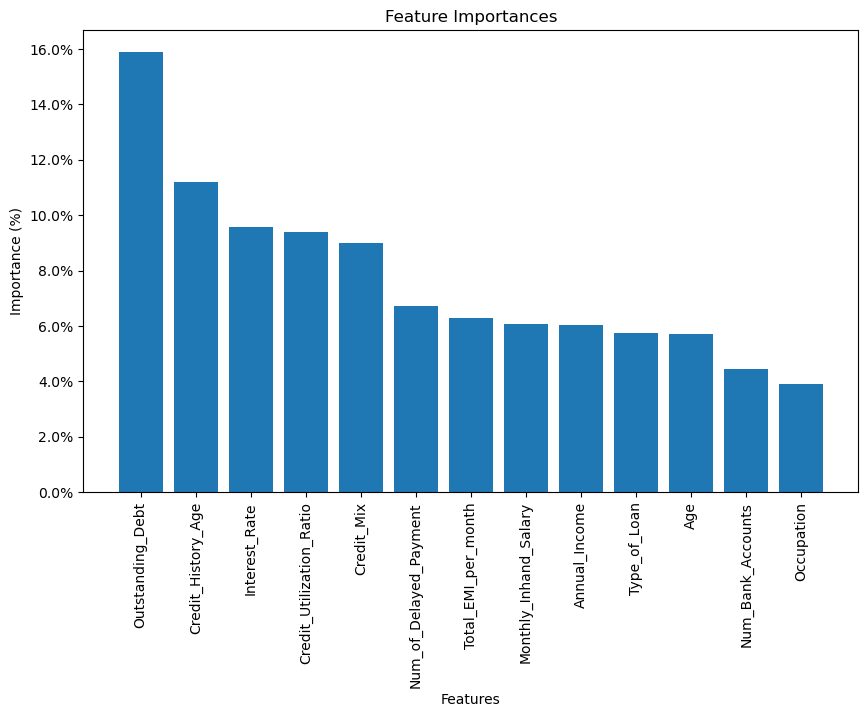

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

X_train = train_df[selected_features]
y_train = train_df['Credit_Score']

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Extract feature importances
importances = random_forest_model.feature_importances_

# Creating a dataframe to store feature importances
feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': importances})

# Sorting the features based on their importance scores
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Calculating the total sum of importances for scaling
total_importance = feature_importances['Importance'].sum()

# Calculating the importance percentages
feature_importances['Importance_Percentage'] = (feature_importances['Importance'] / total_importance) * 100

# Visualizing the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance_Percentage'])
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

According to the feature importance chart, we know that outstanding debt, credit history and interest rates are the top three most important features to contribute to a credit score. Some basic non monetary factors like age and occupation are on the lower end of the importance chart.

**5) Conclusion**

Let us now come back to the business questions. Let's start with the first one:
* Which factors/variables contribute the most to determining credit scores?

Like we saw in our evaluation section, the top three most important factors to determine credit scores are outstanding debt which contributes more than 15%, credit history age and interest rates. Outstanding debt is the amount of money the consumer still has to pay to the creditor. Credit history age is the amount of time the consumer has been using credit from the service provider. Interest rate is the price the consumer pays to borrow money. Lets visualize the top most contributing factor to understand it's relationship to credit score even better. 

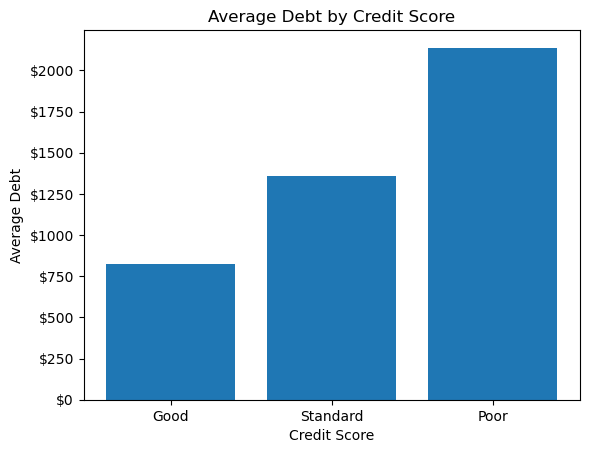

In [21]:
average_debt_by_credit_score = train_df.groupby('Credit_Score')['Outstanding_Debt'].mean()

average_debt_by_credit_score = average_debt_by_credit_score.sort_values(ascending=True)

plt.bar(average_debt_by_credit_score.index, average_debt_by_credit_score.values)
plt.xlabel('Credit Score')
plt.ylabel('Average Debt')
plt.title('Average Debt by Credit Score')

formatter = mtick.FormatStrFormatter('$%.0f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

Here we can see a clear inverse relationship between Outstanding Debt and Credit Score, since the higher the debt, the lower the score and vice versa.

* Do certain professions with high monthly income have better credit scores than others?

Overall, monthly income does not play such an important role in predicting the credit score. It is relatively lower on the feature importances chart, however visualizing it is better to understand. 

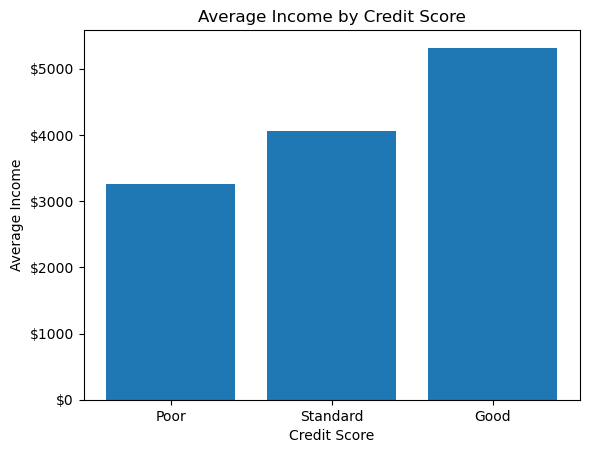

In [22]:
average_income_by_credit_score = train_df.groupby('Credit_Score')['Monthly_Inhand_Salary'].mean()

average_income_by_credit_score = average_income_by_credit_score.sort_values(ascending=True)

plt.bar(average_income_by_credit_score.index, average_income_by_credit_score.values)
plt.xlabel('Credit Score')
plt.ylabel('Average Income')
plt.title('Average Income by Credit Score')

formatter = mtick.FormatStrFormatter('$%.0f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

Here, monthly income has a positive relationship with credit score since higher income leads to better a better credit  score and vice versa. 

* Is it possible to predict a credit score of an individual based on specific attributes?

Based on our model, it is possible to predict the score of an individual based on specific attributes. We tried and tested multiple models out of which the Random Forest Model worked the best with an accuracy of 78% based on limited selected features. We evaluated the model using a classfication report on which it scored around the same for all metrics. We analyzed the model further by performing feature engineering to understand which features play important roles in predicting the credit score. With all this, we believe we can predict the credit score of an individual based on their features with reasonable accuracy.